In [39]:
import librosa
import librosa.display
import pydub 
import numpy as np
import matplotlib.pyplot as plt
from spleeter.separator import Separator
import os
from os.path import isfile, join
import soundfile as sf

In [50]:
file = "../raw_data/056247.mp3"

In [53]:
def plot_chomagram(file):
    instruments = ["056247.mp3", "/056247/bass.wav", "/056247/drums.wav", "/056247/other.wav", "/056247/vocals.wav"]
    for instrument in instruments:
        file = f'../raw_data/{instrument}'
        y, sr = librosa.load(file)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        fig, ax = plt.subplots()
        img = librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax)
        fig.colorbar(img, ax=ax)
        ax.set(title=f'Chromagram {instrument}')
        plt.show()

/Users/judithvanleersum/.pyenv/versions/3.8.6/envs/ai_dj/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


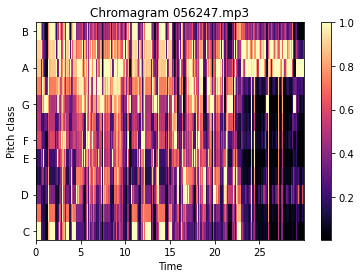

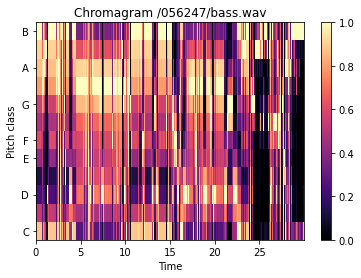

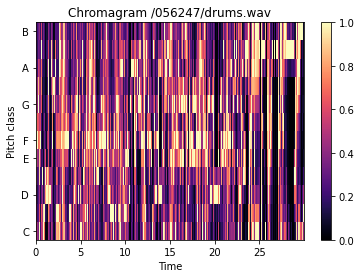

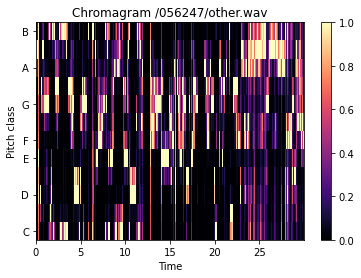

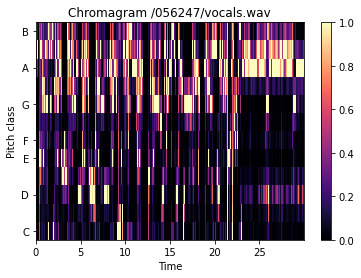

In [54]:
plot_chomagram(file)

In [41]:
test_data_path = "../raw_data/"
results_data_path = "../raw_data/results/"

def sdr(references, estimates):
    # compute SDR for one song
    delta = 1e-7  # avoid numerical errors
    num = np.sum(np.square(references), axis=(1, 2))
    den = np.sum(np.square(references - estimates), axis=(1, 2))
    num += delta
    den += delta
    return 10 * np.log10(num  / den)

def get_music_file_location(test_data_path, results_data_path, music_name, instrument=None):
    test_data_path = "../raw_data/"
    results_data_path = "../raw_data/results/"
    if instrument is None:
        instrument = "mixture"
        return join(test_data_path, music_name, instrument + ".wav")

    if not os.path.exists(results_data_path):
        os.makedirs(results_data_path)
    if not os.path.exists(join(results_data_path, music_name)):
        os.makedirs(join(results_data_path, music_name))

    return join(results_data_path, music_name, instrument + ".wav")


music_names = ["056247"]
instruments = ["bass", "drums", "other", "vocals"]
scores = {}
for music_name in music_names:
    print("Evaluating for: %s" % music_name)
    scores[music_name] = {}
    references = []
    estimates = []
    for instrument in instruments:
        reference_file = join(test_data_path, music_name, instrument + ".wav")
        estimate_file = get_music_file_location(test_data_path, results_data_path, music_name, instrument)
        reference, _ = sf.read(reference_file)
        estimate, _ = sf.read(estimate_file)
        references.append(reference)
        estimates.append(estimate)
    references = np.stack(references)
    estimates = np.stack(estimates)
    references = references.astype(np.float32)
    estimates = estimates.astype(np.float32)
    song_score = sdr(references, estimates).tolist()
    scores[music_name]["sdr_bass"] = song_score[0]
    scores[music_name]["sdr_drums"] = song_score[1]
    scores[music_name]["sdr_other"] = song_score[2]
    scores[music_name]["sdr_vocals"] = song_score[3]
    scores[music_name]["sdr"] = np.mean(song_score)
print(scores)


Evaluating for: 056247


RuntimeError: Error opening '../raw_data/results/056247/bass.wav': System error.

In [26]:
separator = Separator(f'spleeter:4stems')
separator.separate_to_file(file, "../raw_data/")

INFO:tensorflow:Apply unet for vocals_spectrogram
Instructions for updating:
Colocations handled automatically by placer.
INFO:tensorflow:Apply unet for drums_spectrogram
INFO:tensorflow:Apply unet for bass_spectrogram
INFO:tensorflow:Apply unet for other_spectrogram
INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/4stems.tar.gz
INFO:spleeter:Validating archive checksum
INFO:spleeter:Extracting downloaded 4stems archive
INFO:spleeter:4stems model file(s) extracted
INFO:tensorflow:Restoring parameters from pretrained_models/4stems/model


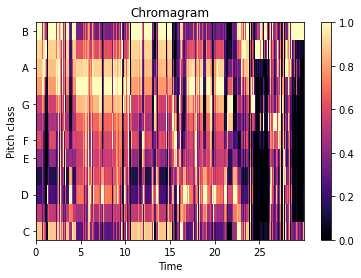

NameError: name 'chroma_shift' is not defined

In [44]:
stem_test_bass = "../raw_data/056247/bass.wav"
plot_chomagram(stem_test_bass)